In [2]:
import numpy as np
X = np.array([.50,1.50,2.00,4.25,3.25,5.50], ndmin=2).reshape((6,1))
y = np.array([0,0,0,1,1,1])
X_mean = np.mean(X)
y_mean = np.mean(y)
n = len(X)
class LogisticRegression:
    b0 = 0
    b1 = 0
    y_pred = np.array([])
    true_positives = 0
    true_negatives = 0
    false_positives = 0
    false_negatives = 0
    def fit(self, X, y):
        upward_function = 0
        downward_function = 0
        for i in range(n):
            upward_function += (X[i]-X_mean)*(y[i]-y_mean)
            downward_function += (X[i]-X_mean)**2
        self.b1 = upward_function / downward_function
        self.b0 = y_mean - (self.b1*X_mean)
        return self.b0, self.b1
    
    def predict(self, Xi):
        z = self.b0 + (self.b1*Xi)
        sigmoid = 1/(1 + np.exp(-z))
        for i in range(n):
            if sigmoid[i] >= 0.5:
                self.y_pred = np.append(self.y_pred, [1])
            else:
                self.y_pred = np.append(self.y_pred, [0])
        return sigmoid, self.y_pred
    
    def confusion_matrix(self):
        for i in range(n):
            if y[i]==1 and self.y_pred[i]==1:
                self.true_positives += 1
            if y[i]==0 and self.y_pred[i]==0:
                self.true_negatives += 1
            if y[i]==1 and self.y_pred[i]==0:
                self.false_negatives += 1
            if y[i]==0 and self.y_pred[i]==1:
                self.false_positives += 1
                
        matrix = np.array([self.true_positives, self.false_negatives, self.false_positives, self.true_negatives]).reshape((2,2))
        return matrix

model = LogisticRegression()
print(model.fit(X, y))
print(model.predict(X))
model.confusion_matrix()

        
    


(array([-0.2409201]), array([0.26150121]))
(array([[0.47248545],
       [0.53776089],
       [0.57005666],
       [0.70484142],
       [0.64770326],
       [0.76805063]]), array([0., 1., 1., 1., 1., 1.]))


array([[3, 0],
       [2, 1]])

In [4]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='none')
lr.fit(X, y)
y_pred = lr.predict(X)
y_pred

array([0, 0, 0, 1, 1, 1])

In [5]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[3, 0],
       [0, 3]], dtype=int64)

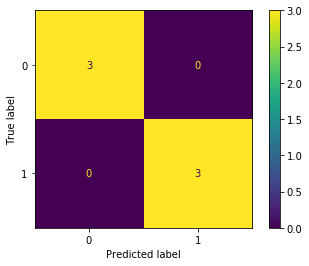

In [6]:
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
plot_confusion_matrix(lr, X, y)
plt.show()